<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Make-nicer-plots" data-toc-modified-id="Make-nicer-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Make nicer plots</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Use-only-data-for-the-second-group" data-toc-modified-id="Use-only-data-for-the-second-group-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use only data for the second group</a></span></li><li><span><a href="#Get-all-unique-users" data-toc-modified-id="Get-all-unique-users-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get all unique users</a></span></li><li><span><a href="#Get-users-who-didn't-receive-notification" data-toc-modified-id="Get-users-who-didn't-receive-notification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get users who didn't receive notification</a></span></li><li><span><a href="#Get-history-for-those-users" data-toc-modified-id="Get-history-for-those-users-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Get history for those users</a></span></li><li><span><a href="#Check-their-activity" data-toc-modified-id="Check-their-activity-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Check their activity</a></span></li><li><span><a href="#How-many-battles-they-played" data-toc-modified-id="How-many-battles-they-played-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>How many battles they played</a></span></li></ul></div>

# Users who didn't receive notification pop-up

### Import libraries

In [2]:
import pandas as pd # used for data storage
import numpy as np # used for data calculations

import matplotlib.pyplot as plt # used for plots
# plots to be shown
%matplotlib inline 

from PIL import Image
import requests
from io import BytesIO
from highlight_text import htext

pd.set_option('display.max_columns', 500) # maximum number of columns to be shown
pd.set_option('display.max_rows', 500) # maximum number of rows to be shown

### Make nicer plots

In [3]:
text_color = "w"
background = "#313332"
plt.rcParams['figure.facecolor'] = background
plt.rcParams['axes.facecolor'] = background
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['figure.titleweight'] = "bold" 
plt.rcParams['figure.figsize'] = (12, 6)

plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color
plt.rcParams["legend.facecolor"] = background
plt.rcParams["legend.frameon"] = False
plt.rcParams["axes.labelweight"] = "bold" 
plt.rcParams["axes.labelcolor"] = text_color 
plt.rcParams["axes.labelsize"] = 14 
plt.rcParams["font.fantasy"] = "Charcoal" 
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = text_color

g1_color = "#f2c641"
g2_color = "#a442f5"
diff_color = "#02faee"

def pretty_plot(url): 
    # adding logo
    ax2 = fig.add_axes([0.02, 0.96, 0.15, 0.15])
    ax2.axis("off")
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    ax2.imshow(img)

    s = "Heroic - AB test - <Not received notification>"
    htext.fig_htext(s, 0.15, 1.02, highlight_colors="#a442f5", highlight_weights=["bold"],
                   string_weight="bold", fontsize=22, color=text_color)


    # remove top and right spines, color bottom and left
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        if s in ["top", "right"]:
            axs.spines[s].set_visible(False)
        else:
            axs.spines[s].set_color(text_color)

### Load data

In [4]:
notification_allowed = pd.read_csv("notification_allowed.csv")
user_history = pd.read_csv("user_history.csv")

### Use only data for the second group

In [5]:
g2_notification = notification_allowed[notification_allowed['login_id'] % 2 == 1]
g2_history = user_history[user_history['login_id'] % 2 == 1]

### Get all unique users

In [6]:
g2_notification_users = g2_notification["login_id"].unique()
g2_history_users = g2_history["login_id"].unique()

### Get users who didn't receive notification

In [7]:
g2_not_notification_users = g2_history_users[~np.in1d(g2_history_users,g2_notification_users)]

### Get history for those users

In [8]:
g2_history_not_notification = g2_history[g2_history["login_id"].isin(g2_not_notification_users)]

### Check their activity

In [9]:
g2_history_not_notif_act = g2_history_not_notification.groupby("login_id", as_index=False)\
.dau.sum().sort_values(by="dau", ascending=False)
g2_history_not_notif_act

,login_id,dau
1071,4827,3
327,1451,3
680,3091,3
851,3859,3
874,3957,3
553,2493,3
684,3109,3
910,4133,2
486,2219,2
993,4501,2


In [11]:
g2_history_not_notif_act.groupby("dau").login_id.count()

dau
0       3
1    1066
2      42
3       7
Name: login_id, dtype: int64

### How many battles they played
- Print values
- Plot values

In [12]:
g2_history_not_notif_battles = g2_history_not_notification.groupby("login_id", as_index=False).battles_played.sum()\
.sort_values(by="battles_played", ascending=False)
g2_history_not_notif_battles

,login_id,battles_played
130,573,5
179,831,5
694,3143,5
697,3151,5
1031,4637,5
706,3185,5
51,241,5
54,253,5
1018,4587,5
59,267,5


In [13]:
by_battles_count = g2_history_not_notif_battles.groupby("battles_played").login_id.count()
by_battles_count

battles_played
0    109
1    219
2    331
3    247
4    163
5     49
Name: login_id, dtype: int64

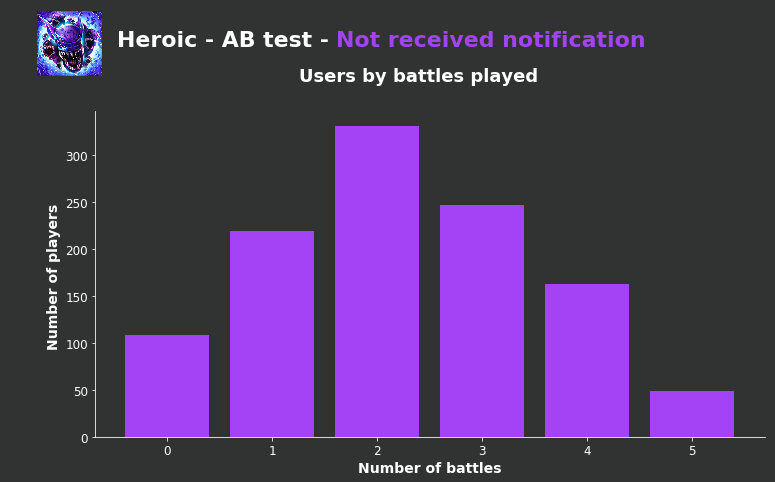

In [14]:
fig, axs = plt.subplots()
plt.bar(by_battles_count.index, by_battles_count, color=g2_color)
plt.xticks(by_battles_count.index) 
plt.xlabel("Number of battles")
plt.ylabel("Number of players ")
fig.suptitle('Users by battles played', color=text_color)

pretty_plot(url="https://lh3.googleusercontent.com/o_NRs0AhOXGTNY8BVQ7JDq5buQgRGM33EM_fxemSDrNnU3YUofNHjIqriUH-MjIWDANt")

We have some 49 players who didn't receive notification pop-up. More precisely, they didn't answer on pop-up. 

In [19]:
g2_history[g2_history["login_id"].isin(list(g2_history_not_notif_battles[g2_history_not_notif_battles["battles_played"] == 0]["login_id"]))]

,login_id,registration_date_id,registration_channel,registration_country,payer,dau,sessions_count,playtime,last_login_day,days_active_last_7_days,cohort_size,elo_rating,arena_level,gold,runes_stash_class1_tier1,runes_stash_class2_tier1,runes_stash_class3_tier1,runes_stash_tier2,spell_runes_stash,hero_dust,item_dust,gold_gained_total,gold_bought_total,gold_spent_total,runes_gained_total_class1_tier1,runes_gained_total_class2_tier1,runes_gained_total_class3_tier1,runes_gained_total_tier_2,spell_runes_gained_total,runes_spent_class1_tier1,runes_spent_class2_tier1,runes_spent_class3_tier1,runes_spent_total_tier2,spell_runes_spent_total,hero_dust_spent_total,hero_dust_gained_total,tokens,tokens_gained_total,enter_queue_count,battles_played,battles_won,battles_played_total,battles_won_total,heroes_unlocked,heroes_level,hero_shards,minion_upgrades,free_chests_opened_total,silver_chests_opened_total,golden_chests_opened_total,magical_chests_opened_total,victory_chests_opened_total,pvp_event_small_chest_small,pvp_event_small_chest_medium,pvp_event_small_chest_large,pvp_event_big_chest_small,pvp_event_big_chest_medium,pvp_event_big_chest_large,cards_gained_total,minion_cards_gained_common_total,minion_cards_gained_rare_total,minion_cards_gained_epic_total,minion_cards_gained_legendary_total,spell_cards_gained_common_total,spell_cards_gained_rare_total,spell_cards_gained_epic_total,spell_cards_gained_legendary_total,campaign_tickets,max_campaign_level,equipment_bonus,campaign_battles,campaign_battles_total,event_battles,event_battles_total,event_tokens,group_points,lives_spent,milestone_points,date_id
14,15,0,Paid,Germany,False,1,1,84,0,1,1,10,0,100,0,15,0,0,0,0,10,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,3,0,0.0,0,0,0,0,5,0,0,0,0
114,115,0,Organic,Brazil,False,1,1,210,0,1,1,10,0,100,0,15,0,0,0,0,10,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,1,0,0.0,2,2,0,0,5,0,0,0,0
170,171,0,Paid,United States,False,0,0,0,0,0,1,10,0,100,0,0,15,0,0,0,10,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0
306,307,0,Organic,Italy,False,1,1,518,0,1,1,10,0,100,0,0,15,0,0,0,10,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0.0,3,3,0,0,5,0,0,0,0
395,15,0,Paid,Germany,False,0,0,0,0,1,1,10,0,100,0,15,0,0,0,0,10,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,3,0,0.0,0,0,0,0,5,0,0,0,1
495,115,0,Organic,Brazil,False,0,0,0,0,1,1,10,0,100,0,15,0,0,0,0,10,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,1,0,0.0,0,2,0,0,5,0,0,0,1
551,171,0,Paid,United States,False,0,0,0,0,0,1,10,0,100,0,0,15,0,0,0,10,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1
687,307,0,Organic,Italy,False,0,0,0,0,1,1,10,0,100,0,0,15,0,0,0,10,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0.0,0,3,0,0,5,0,0,0,1
875,495,1,Paid,Italy,False,1,1,413,1,1,1,10,0,100,0,0,15,0,0,0,10,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,1,0,0.0,2,2,0,0,5,0,0,0,1
893,513,1,Organic,United Kingdom,False,1,1,189,1,1,1,10,0,100,0,0,15,0,0,0,10,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,2,0,0.0,1,1,0,0,5,0,0,0,1
